<a href="https://colab.research.google.com/github/ShatakshiTripathi/Currency-Converter/blob/main/Loan_Default_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loan Default Predictor

 Step 1: Load, Explore, Clean & Train ML Model

Dataset snapshot:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2 

/tmp/ipython-input-3646858201.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-3646858201.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u


Model Accuracy: 75.61%

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



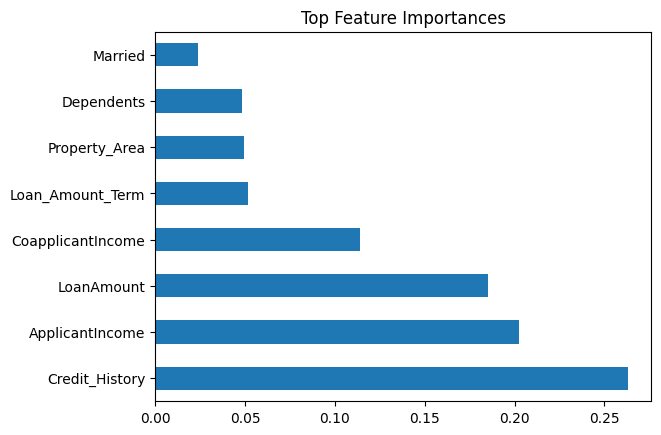

In [10]:
# Loan Default Predictor  | Step 1: Load, Explore, Clean & Train ML Model

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (Make sure you uploaded the CSV in Colab Files)
df = pd.read_csv('train.csv')

# Quick look at data
print("Dataset snapshot:")
print(df.head())

print("\nDataset shape:", df.shape)
print("\nMissing values per column:")
print(df.isnull().sum())

# Data Cleaning & Preprocessing

# Fill missing categorical values with mode
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill missing numerical values with median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Encode categorical variables
label_enc_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in label_enc_cols:
    df[col] = le.fit_transform(df[col])

# Feature & Target split
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

# Scale numerical features
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training - Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions & Evaluation
y_pred = model.predict(X_test)
print(f"\nModel Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize feature importance (optional but recruiter friendly)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.title('Top Feature Importances')
plt.show()


Step 2: Detailed Exploratory Data Analysis (EDA)

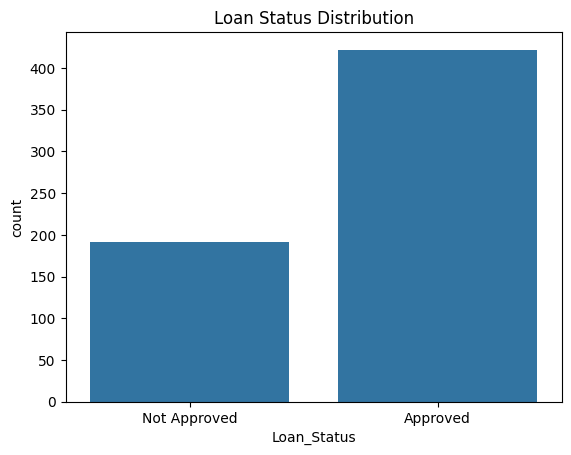

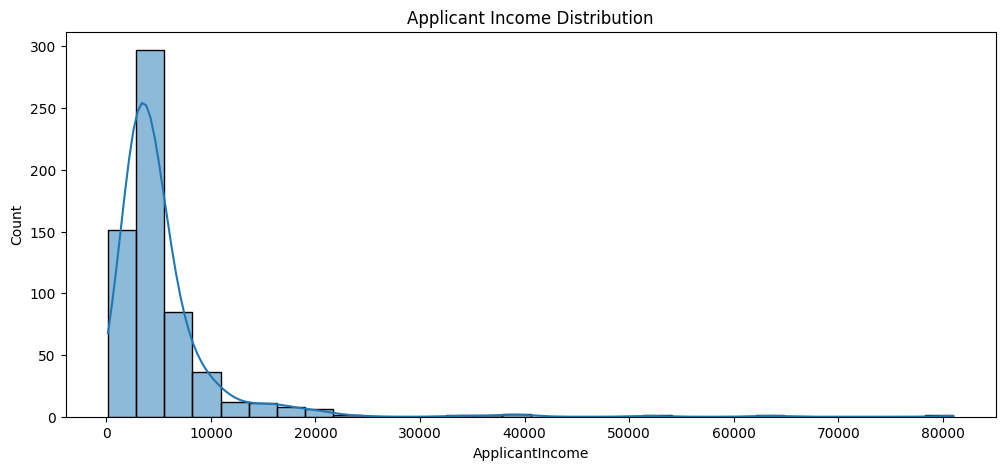

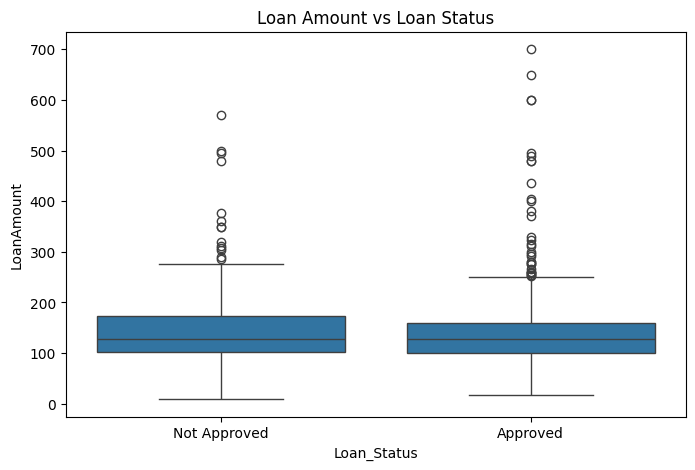

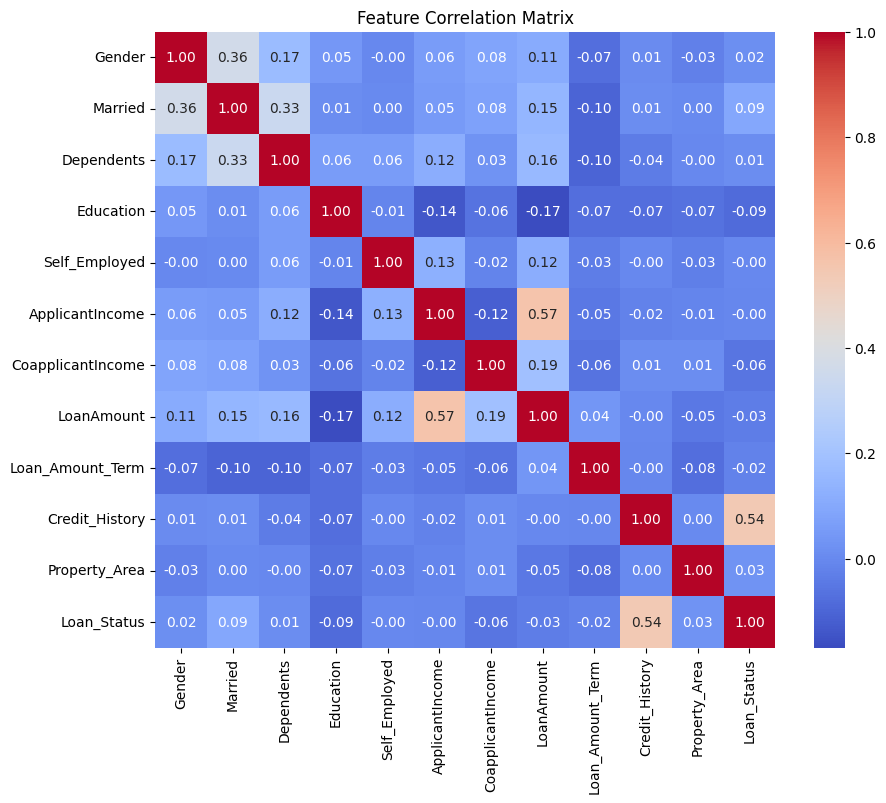

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Target distribution (Loan Status)
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status Distribution')
plt.xticks(ticks=[0,1], labels=['Not Approved', 'Approved'])
plt.show()

# 2. Income distribution
plt.figure(figsize=(12,5))
sns.histplot(df['ApplicantIncome'], bins=30, kde=True)
plt.title('Applicant Income Distribution')
plt.show()

# 3. Boxplot of LoanAmount by Loan Status
plt.figure(figsize=(8,5))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title('Loan Amount vs Loan Status')
plt.xticks(ticks=[0,1], labels=['Not Approved', 'Approved'])
plt.show()

# 4. Correlation heatmap
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


Step 3: Hyperparameter Tuning for Better Model Performance

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)

# Use best estimator to predict
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print(f"Improved Accuracy: {accuracy_score(y_test, y_pred_best) * 100:.2f}%")
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Improved Accuracy: 77.24%
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



Step 4: Save the Final Model

In [14]:
import joblib

joblib.dump(best_model, 'loan_default_predictor_model.pkl')


['loan_default_predictor_model.pkl']